In [30]:
import pymatgen
import os
import unittest
import warnings
from numbers import Number

from pathlib import Path
#from collections import OrderDict
import numpy as np
from pymatgen.analysis.phase_diagram import(
     CompoundPhaseDiagram, GrandPotentialPhaseDiagram,
     GrandPotPDEntry, PDEntry,PDPlotter, PhaseDiagram,
      ReactionDiagram,TransformedPDEntry, tet_coord,triangular_coord,uniquelines)

In [31]:
input_data = {"Ca":-9.6682,"V":-17.426752,"F2":-6.9022176, 
              
              "CaF2":-17.3306788,
              
              "VF3":-39.1901045, "VF4":-43.7358960, "VF5":-47.982425,
             
    
               
              "Ca0.5VF3":-46.64719, 
              
              "Ca1.5V2F7":-108.1035783, "V2F7":-82.76139}
              
              

In [32]:
from pymatgen.analysis.phase_diagram import Composition
entries =[PDEntry(k,v) for k,v in input_data.items()]

#include charged phase of peroveskite (VF3)
VF3_met=PDEntry(Composition("VF3"),-39.05147,name="VF3_c")
entries.append(VF3_met)

#include charged orthorhombic phase (V2F7), lower energy than the trigonal
V2F7_orth=PDEntry(Composition("V2F7"),-82.83143,name="V2F7_O")
entries.append(V2F7_orth)

phase_diagram_1 = PhaseDiagram(entries)
plotter_1 = PDPlotter(phase_diagram_1, show_unstable=True, markersize=20)
plotter_1.show() 
#plotter_1.write_image( stream = 'CaxV2F7', image_format = 'svg')
print(phase_diagram_1.stable_entries)

{PDEntry : V1 F5 with energy = -47.9824, PDEntry : V1 F3 with energy = -39.1901, PDEntry : V1 F4 with energy = -43.7359, PDEntry : V1 with energy = -17.4268, PDEntry : F2 with energy = -6.9022, PDEntry : Ca1 F2 with energy = -17.3307, PDEntry : Ca1 with energy = -9.6682, PDEntry : Ca1.5 V2 F7 with energy = -108.1036}


In [28]:
decomp_1= phase_diagram_1.get_decomposition(Composition("V2F7"))
decomp_1

{PDEntry : V1 F4 with energy = -43.7359: 0.5555555555555558,
 PDEntry : V1 F3 with energy = -39.1901: 0.4444444444444442}

In [29]:
decomp_2= phase_diagram_1.get_decomposition(Composition("Ca1.5V2F7"))
decomp_2

{PDEntry : V1 F4 with energy = -43.7359: 0.4761904761904763,
 PDEntry : V1 F3 with energy = -39.1901: 0.3809523809523814,
 PDEntry : Ca1 with energy = -9.6682: 0.1428571428571429}

In [58]:
ehull_1 = phase_diagram_1.get_e_above_hull(PDEntry(  "V2F7",-82.76139))

#Returns:- Stable entries should have energy above convex hull of 0. The energy is given per atom.

print("The energy above hull of V2F7 is {0} eV/atom.".format(ehull_1))
    

The energy above hull of V2F7 is 0.018290055555558737 eV/atom.


In [59]:
#ehull_2 = phase_diagram_1.get_e_above_hull(PDEntry("CaCo2S3O12",-178.321))
#print("The energy above hull of Ca2Cr2(SiO4)3 is {0} eV/atom.".format(ehull_2))

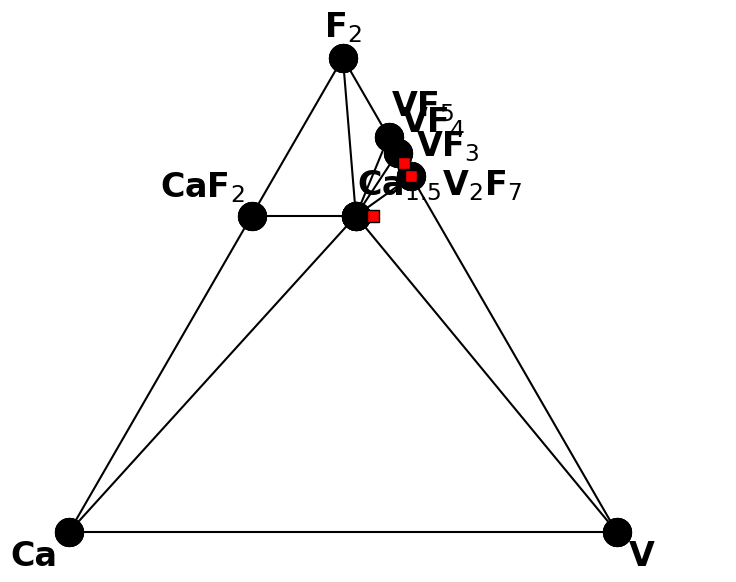

In [60]:
phase_diagram_2 = CompoundPhaseDiagram(entries,[Composition("Ca"),
                                                Composition("V"),
                                                Composition("F")])

compound_plotter_2 = PDPlotter(phase_diagram_2, show_unstable=True, backend = "matplotlib",  markersize=20)
z = compound_plotter_2.get_plot(label_unstable=False, label_stable=True)
#z.savefig('CaxTi2F7.pdf')
z.show()   

compound_plotter_2 = PDPlotter(phase_diagram_2, show_unstable = 0.2, markerize=20)
y = compound_plotter_2.get_plot(phase_diagram_2, label_unstable=True)
y.show()




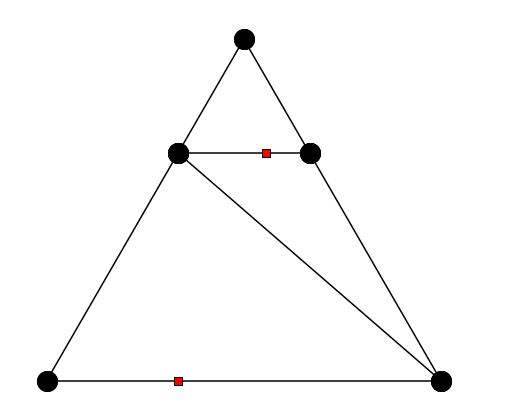

In [9]:
phase_diagram_2 = CompoundPhaseDiagram(entries,[Composition("CaO"),
                                                Composition("CoO"),
                                                Composition("SO3")])

compound_plotter_2 = PDPlotter(phase_diagram_2, show_unstable=True, backend = "matplotlib",  markersize=20)
z = compound_plotter_2.get_plot(label_unstable=False, label_stable=False)
#z.savefig('40-CaCo2S3O12.pdf')
z.show()   

compound_plotter_2 = PDPlotter(phase_diagram_2, show_unstable = 0.2, markerize=20)
y = compound_plotter_2.get_plot(phase_diagram_2, label_unstable=True)
y.show()



In [10]:
phase_diagram_3 = CompoundPhaseDiagram(entries,[Composition("Ca"),
                                                Composition("S"),
                                                Composition("O2")])
#CompoundPhaseDiagram:-Generates phase diagrams from compounds as terminations instead of elements


#get_plot and show:- Draw the phase diagram using Plotly (or Matplotlib) and show it.

compound_plotter_3 = PDPlotter(phase_diagram_3, show_unstable=True, markerize=20)
z = compound_plotter_3.get_plot(phase_diagram_3, label_unstable=True)
z.show()

In [11]:
phase_diagram_4 = CompoundPhaseDiagram(entries,[Composition("Co"),
                                                Composition("S"),
                                                Composition("O2")])
#CompoundPhaseDiagram:-Generates phase diagrams from compounds as terminations instead of elements


#get_plot and show:- Draw the phase diagram using Plotly (or Matplotlib) and show it.

compound_plotter_4 = PDPlotter(phase_diagram_4, show_unstable=True, markerize=20)
z = compound_plotter_4.get_plot(phase_diagram_4, label_unstable=True)
z.show()